sigma bacchetta
2.4830692560032317e-08


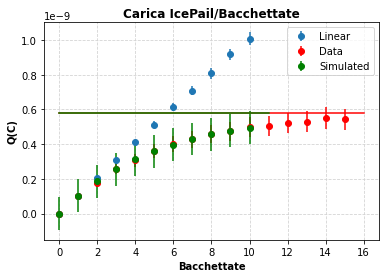

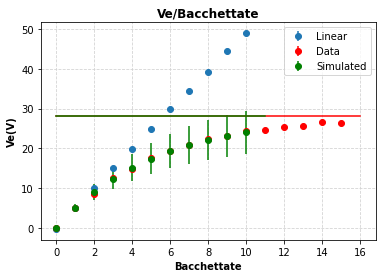

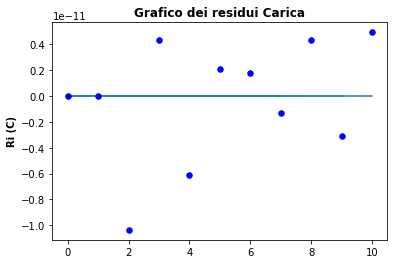

sigma_post_fit
4.743674352021545e-12
Qerr
[0.00000000e+00 1.74024735e-11 2.39696966e-11 3.19988457e-11
 3.66455855e-11 4.22645235e-11 4.62398364e-11 4.92430836e-11
 5.25876095e-11 5.40864187e-11 5.68196481e-11 5.73483698e-11
 5.90523309e-11 5.98715318e-11 6.21736234e-11 6.12852457e-11]


In [94]:
#sfera attaccata al generatore, si carica la bacchetta sulla sfera, si scarica sull'ice pail e si misura V
#prima con una bacchettata -> misura, poi altra bacchettata -> misura ecc
#per verificare che a x bacchettate si ha una carica x volte piu grande
#confrontando un valore simulato dalla prima bacchettata dovrebbe crescere non come un multiplo
#ma con qualcoa in meno arrivando ad un valore di saturazione, quando densità bacchetta = densità ice pail

import numpy as np
import matplotlib.pyplot as plt

D2 = 0.15
D1 = 0.1
D2err = 0.01
D1err = 0.0001
L = 0.15
Lerr = 0.0001
eps = 8.859E-12

Cg = 2*np.pi*eps*L/np.log(D2/D1)
epsL = Lerr/L
errlnD2 = D2err/D2
epslnD2 = errlnD2/np.abs(np.log(D2))
errlnD1 = D1err/D1
epslnD1 = errlnD1/np.abs(np.log(D1))
Cgerr = Cg*(epsL+epslnD1+epslnD2)

Sicepail = np.pi*D1/2*L
Sicepailerr = Sicepail*(Lerr/L+D1err/D1)

DBacchetta = 0.04
DBerr = 0.0001
SBacchetta = np.pi*DBacchetta**2
SBacchettaerr = SBacchetta*2*DBerr/DBacchetta

Vdata = np.array([0,4.94334415,9.01752889,12.37537345,15.14282776,17.4236967,19.30353374,20.85284998,22.12975896,23.18215648,24.04951707,24.7643747,25.35354308,25.83912141,26.2393233,26.56916008])
Vdataerr = np.ones(len(Vdata))*0.3
Vdata = np.concatenate((Vdata[:2],Vdata[2:]-np.random.normal(0, Vdataerr[2:], len(Vdata)-2)))
#Vdata = np.array([0,])
#Vdataerr = np.array([0,])
Qdata = Vdata*Cg
Qdataerr = np.concatenate(([0],Qdata[1:]*((Vdataerr[1:]/Vdata[1:])**2+(Cgerr/Cg)**2)**(1/3)))


Ve = np.arange(0,max(Vdata)*2,Vdata[1]-Vdata[0])
Ve_err = np.ones(len(Ve))*Vdataerr[0]
Ve = Ve-np.random.normal(0, Ve_err, len(Ve))
Q = Cg*Ve
Qerr = Q*((Cgerr/Cg)**2+(Ve_err/Ve)**2)**(1/2)
QBacchetta = Q[1]*(1+SBacchetta/Sicepail)
QBacchettaerr = QBacchetta*(Qerr[1]/Q[1]+(SBacchettaerr+Sicepailerr)/(SBacchetta+Sicepail)+Sicepailerr/Sicepail)

#QBacchettasimulated = 1.2351033997215086e-10
QBacchettasimulated = Qdata[1]*(1+SBacchetta/Sicepail)
#QBacchettasimulatederr = 9.458887786167046e-12
QBacchettasimulatederr = QBacchettasimulated*(Qdataerr[1]/Qdata[1]+(SBacchettaerr+Sicepailerr)/(SBacchetta+Sicepail)+Sicepailerr/Sicepail)


Qsimulation = np.zeros(len(Ve))
Qsimulationerr = np.zeros(len(Ve))
Vesimulation = np.zeros(len(Ve))
Vesimulationerr = np.zeros(len(Ve))
for i in range(1,len(Ve)):
  Qsimulation[i] = (Qsimulation[i-1]+QBacchettasimulated)*Sicepail/(Sicepail+SBacchetta)
  Qsimulationerr[i] = Qsimulation[i]*((Qsimulationerr[i-1]+QBacchettasimulatederr)/(Qsimulation[i-1]+QBacchettasimulated)+(Sicepailerr/Sicepail)+(Sicepailerr+SBacchettaerr)/(Sicepail+SBacchetta))
  Vesimulation[i] = Qsimulation[i]/Cg
  Vesimulationerr[i] = Vesimulation[i]*((Qsimulationerr[i]/Qsimulation[i])+(Cgerr/Cg))





print("sigma bacchetta")
print(QBacchetta/SBacchetta)

Bacchettate = np.arange(0,len(Ve),1)
Bacchettatedata = np.arange(0,len(Qdata),1)

fig = plt.figure()
ax = fig.gca()
plt.title("Carica IcePail/Bacchettate",fontweight="bold")
plt.xlabel("Bacchettate",fontweight="bold")
plt.ylabel("Q(C)",fontweight="bold")

plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.errorbar(Bacchettate, Q, yerr=Qerr, fmt='o',label="Linear")
plt.errorbar(Bacchettatedata,Qdata, yerr=Qdataerr ,color = 'red', fmt='o',label="Data")
plt.errorbar(Bacchettate,Qsimulation,yerr=Qsimulationerr[i],color = 'green', fmt='o',label="Simulated")
plt.plot(np.linspace(0,len(Vdata),1000),np.ones(1000)*QBacchettasimulated*Sicepail/SBacchetta,color = 'red')
plt.plot(np.linspace(0,len(Ve),1000),np.ones(1000)*QBacchettasimulated*Sicepail/SBacchetta,color = 'green')
plt.legend(loc="best")
plt.show()





fig = plt.figure()
ax = fig.gca()
plt.title("Ve/Bacchettate",fontweight="bold")
plt.xlabel("Bacchettate",fontweight="bold")
plt.ylabel("Ve(V)",fontweight="bold")

plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.errorbar(Bacchettate, Ve, yerr=Ve_err, fmt='o',label="Linear")
plt.errorbar(Bacchettatedata,Vdata, yerr=Vdataerr ,color = 'red', fmt='o',label="Data")
plt.errorbar(Bacchettate,Vesimulation, yerr=Vesimulationerr ,color = 'green', fmt='o',label="Simulated")
plt.plot(np.linspace(0,len(Qdata),1000),np.ones(1000)*QBacchettasimulated*Sicepail/SBacchetta/Cg,color = 'red')
plt.plot(np.linspace(0,len(Ve),1000),np.ones(1000)*QBacchettasimulated*Sicepail/SBacchetta/Cg,color = 'green')

plt.legend(loc="best")
plt.show()


Ri = Qdata[:len(Qsimulation)]-Qsimulation


fig = plt.figure()
ax = fig.gca()
plt.title("Grafico dei residui Carica",fontweight="bold")
plt.ylabel("Ri (C)",fontweight="bold")
plt.plot(np.linspace(0,Bacchettate,1000),np.zeros(1000))
plt.scatter(Bacchettate,Ri, s=30, color='blue',zorder=3)

plt.show()


sigma_post_fit = (np.sum((Ri)**2)/(len(Qsimulation)-1))**(1/2)
print("sigma_post_fit")
print(sigma_post_fit)

print("Qerr")
print(Qdataerr)